In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Bewfore getting started with creating model first go through the EDA (Exploration Data Analysis) that is :
1.studying the each variable and what does it represent.
2.calculating ddescriptive analysis that is mean,mode,....etc.
3.treating missing values if is there any using deletion ,imputing or capping.
4.treating outlier.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


let us drop the "CustomerID" column as it has all diffrent values and it does not make any contribution in model

Female    112
Male       88
Name: Gender, dtype: int64

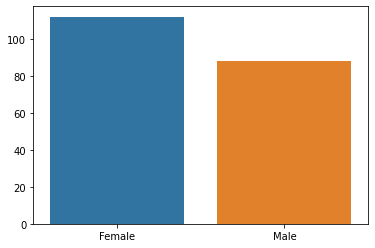

In [5]:
gender_count=data['Gender'].value_counts()
sns.barplot(x= gender_count.index,y=gender_count.values)
gender_count

distribustion of "Annual Income (k$)" is not uniform and it is little bit skewed 

(array([32., 26., 40., 44., 36., 14.,  4.,  4.]),
 array([ 15.  ,  30.25,  45.5 ,  60.75,  76.  ,  91.25, 106.5 , 121.75,
        137.  ]),
 <BarContainer object of 8 artists>)

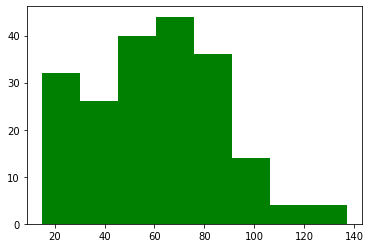

In [6]:
plt.hist(data['Annual Income (k$)'],bins=8,color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x133454c3160>,
 'caps': [<matplotlib.lines.Line2D at 0x133454c3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x133454b5e20>],
 'medians': [<matplotlib.lines.Line2D at 0x133454c3ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x133454cf280>],
 'means': []}

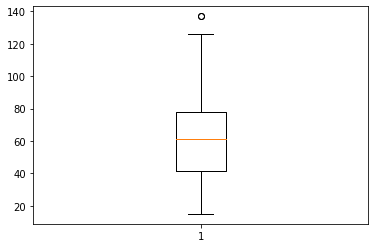

In [7]:
plt.boxplot(data['Annual Income (k$)'])

graph shows that most of the customers are of age between 26-35 years old

(array([40., 58., 31., 35., 19., 17.]),
 array([18.        , 26.66666667, 35.33333333, 44.        , 52.66666667,
        61.33333333, 70.        ]),
 <BarContainer object of 6 artists>)

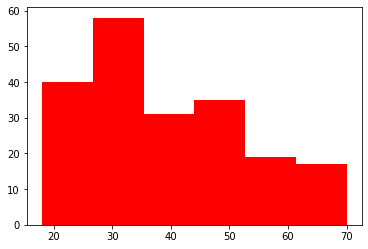

In [8]:
plt.hist(data['Age'],bins=6,color='red')

In [17]:
 from sklearn.preprocessing import StandardScaler
X = data.values[:,[3,4]]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
intertia_points=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    intertia_points.append(kmeans.inertia_)

In [14]:
df=pd.DataFrame({'cluster':range(1,11),'points':intertia_points})

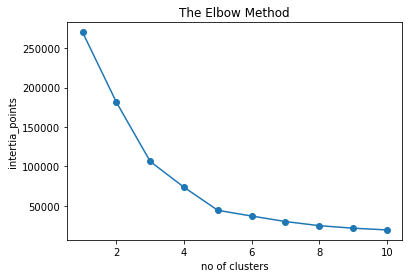

In [15]:
plt.plot(df['cluster'], df['points'],marker='o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('intertia_points')
plt.show()

In [20]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)
kmeans.fit(X)
predictions=kmeans.predict(X)

In [21]:
predictions

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

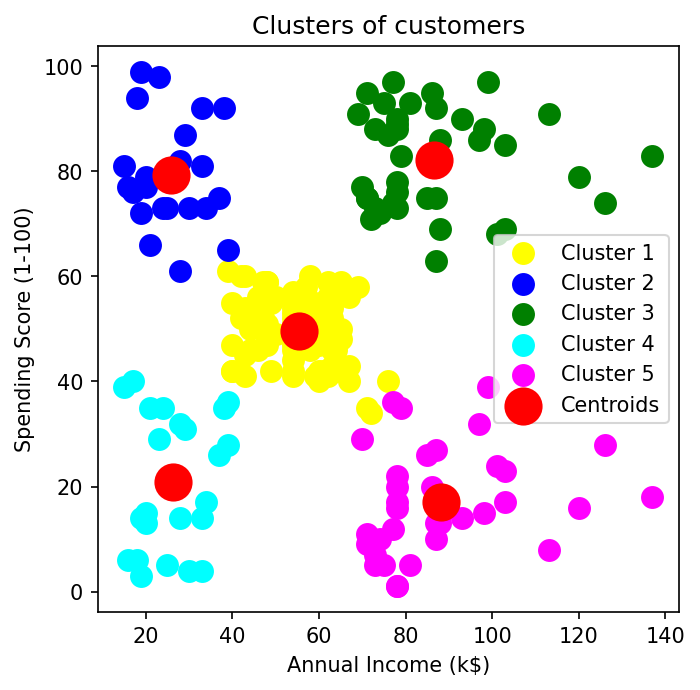

In [25]:
plt.figure(figsize=(5,5),dpi=150)
plt.scatter(X[ predictions== 0, 0], X[predictions == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predictions== 2, 0], X[predictions == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()